In [1]:
PADDING = 2
HEIGHT_OF_KEY = 5
WIDTH_OF_SCREEN = 400
KEYSLIST = ["qwertyuiop", "asdfghjkl", "zxcvbnm"]

In [2]:
WIDTH_OF_KEY =  (WIDTH_OF_SCREEN - (2 * PADDING)) / len(KEYSLIST[0])
print("Width of key: ",WIDTH_OF_KEY)
print("Width of half key: ",WIDTH_OF_KEY/2)


Width of key:  39.6
Width of half key:  19.8


In [3]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [4]:
pointsOfKeys = []
keysPointsDict = {}



for rowIndex, keys in enumerate(KEYSLIST):
    heightOffset = (rowIndex * (HEIGHT_OF_KEY + (2 * PADDING))) + (HEIGHT_OF_KEY / 2)
    initalWidthOffset = (WIDTH_OF_SCREEN - (len( keys) * WIDTH_OF_KEY)) / 2

    for index, key in enumerate(keys):
        widthOffset = initalWidthOffset + (index * WIDTH_OF_KEY) + (WIDTH_OF_KEY/2)
        point = Point(widthOffset,heightOffset)

        pointsOfKeys.append((key,point))
        keysPointsDict[key] = point

In [7]:
print(keysPointsDict["q"].x)
pointsOfKeys

21.8


[('q', <__main__.Point at 0x15ce9ba04f0>),
 ('w', <__main__.Point at 0x15ce9ba0640>),
 ('e', <__main__.Point at 0x15ce9ba0760>),
 ('r', <__main__.Point at 0x15ce9ba07c0>),
 ('t', <__main__.Point at 0x15ce9ba0880>),
 ('y', <__main__.Point at 0x15ce9ba05b0>),
 ('u', <__main__.Point at 0x15ce9ba0940>),
 ('i', <__main__.Point at 0x15ce9ba0670>),
 ('o', <__main__.Point at 0x15ce9ba09d0>),
 ('p', <__main__.Point at 0x15ce9ba0a30>),
 ('a', <__main__.Point at 0x15ce9ba09a0>),
 ('s', <__main__.Point at 0x15ce9ba0ac0>),
 ('d', <__main__.Point at 0x15ce9ba0b50>),
 ('f', <__main__.Point at 0x15ce9ba0b80>),
 ('g', <__main__.Point at 0x15ce9ba0be0>),
 ('h', <__main__.Point at 0x15ce9ba0c40>),
 ('j', <__main__.Point at 0x15ce9ba0ca0>),
 ('k', <__main__.Point at 0x15ce9ba0bb0>),
 ('l', <__main__.Point at 0x15ce9ba0070>),
 ('z', <__main__.Point at 0x15ce9ba0d30>),
 ('x', <__main__.Point at 0x15ce9ba0dc0>),
 ('c', <__main__.Point at 0x15ce9ba0e80>),
 ('v', <__main__.Point at 0x15ce9ba01c0>),
 ('b', <__m

In [8]:
print(pointsOfKeys[0][1].x)
print(pointsOfKeys[0][1].y)

21.8
2.5


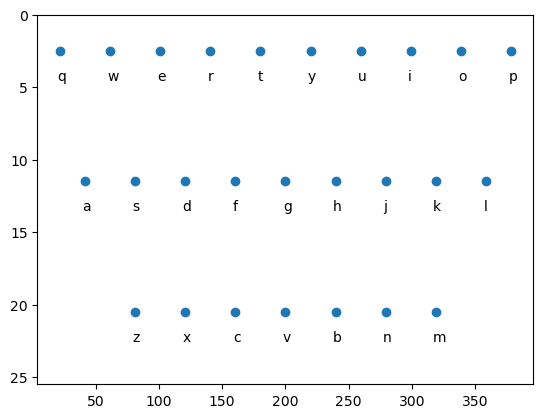

In [9]:
import matplotlib.pyplot as plt



x = [p[1].x for p in pointsOfKeys]
y = [p[1].y for p in pointsOfKeys]
key = [p[0] for p in pointsOfKeys]

fig,ax = plt.subplots()
ax.scatter(x,y)

for i, txt in enumerate(key):
    ax.annotate(txt,(x[i] - 2,y[i] + 2))

ax.set_ylim((0,max(y) + 5))
axs = plt.gca()
axs.invert_yaxis() #Invert the y axis

In [10]:
WORD = "SEA"
wordPointsList = []



for char in WORD:
    char = char.lower()
    wordPointsList.append(keysPointsDict.get(char))
    print(keysPointsDict.get(char).x,keysPointsDict.get(char).y)


81.19999999999999 11.5
101.0 2.5
41.59999999999998 11.5


In [11]:
x_coords  = [i.x for i in wordPointsList]
y_coords  = [i.y for i in wordPointsList]

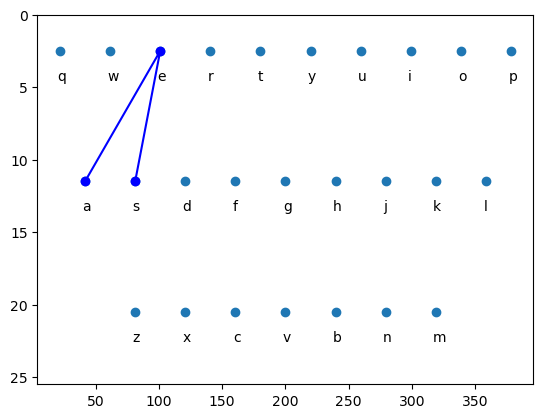

In [12]:


fig, ax = plt.subplots()
ax.scatter(x,y)


for i, txt in enumerate(key):
    ax.annotate(txt,(x[i] - 2,y[i] + 2))

ax.set_ylim((0,max(y) + 5))

axs = plt.gca()
axs.invert_yaxis()
ax.plot(x_coords, y_coords, marker='o', linestyle='-', color='b')


In [13]:
import numpy as np


def add_noise(p :Point,NOISE = 0.5 ):
    return Point(np.random.normal(p.x, NOISE),np.random.normal(p.y, NOISE))

point = Point(1,2)
random_near_point = add_noise(point)

print(random_near_point.x,random_near_point.y)

0.6850553215976467 1.8338046163408344


In [14]:
def drawKeyBoard():
    x = [p[1].x for p in pointsOfKeys]
    y = [p[1].y for p in pointsOfKeys]
    key = [p[0] for p in pointsOfKeys]

    fig,ax = plt.subplots()
    ax.scatter(x,y)

    for i, txt in enumerate(key):
        ax.annotate(txt,(x[i] - 2,y[i] + 2))

    ax.set_ylim((0,max(y) + 5))
    axs = plt.gca()
    axs.invert_yaxis()
    return ax

In [15]:
def drawCrtPointsForSentence( sentence : str):
    ax = drawKeyBoard()
    wordPointsList = []

    for char in sentence:
        char = char.lower()
        if (char != " "):
            wordPointsList.append(keysPointsDict.get(char))

    x_coords  = [i.x for i in wordPointsList]
    y_coords  = [i.y for i in wordPointsList]

    ax.plot(x_coords,y_coords)



<Axes: >

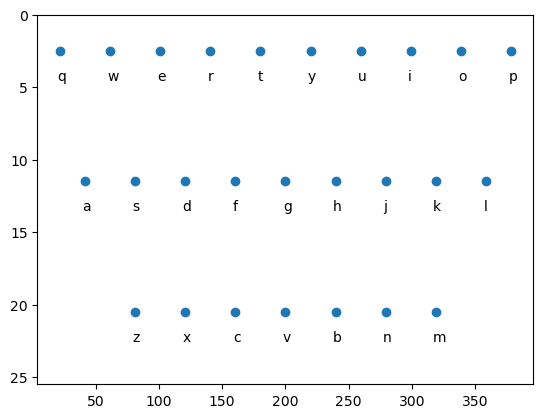

In [16]:
drawKeyBoard()

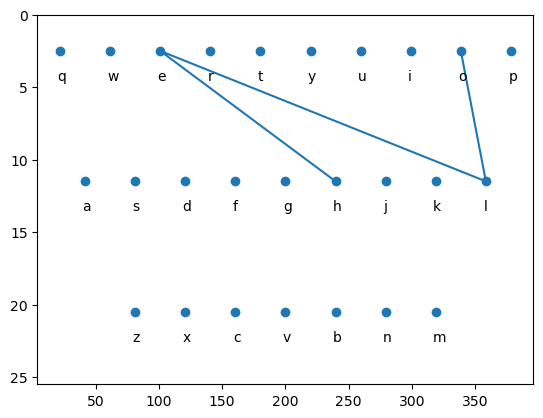

In [17]:
drawCrtPointsForSentence("HELLO")

In [18]:
def drawPointsWithNoiseForSentence( sentence : str,NOISE = 0.5):
    ax = drawKeyBoard()
    wordPointsList = []

    for char in sentence:
        char = char.lower()
        if (char != " "):
            noised_point = add_noise(keysPointsDict.get(char),NOISE = NOISE)
            wordPointsList.append(noised_point)

    x_coords  = [i.x for i in wordPointsList]
    y_coords  = [i.y for i in wordPointsList]


    ax.plot(x_coords,y_coords)



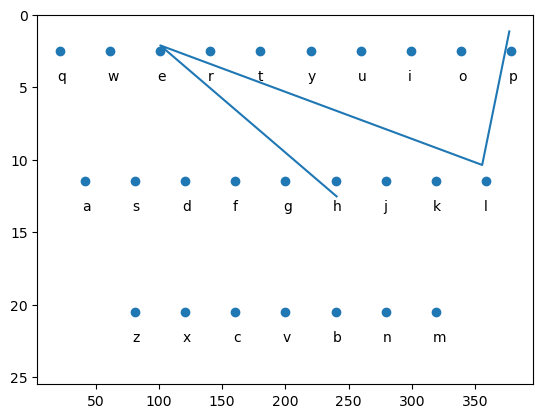

In [19]:
drawPointsWithNoiseForSentence("HELP", NOISE= 2)

## Geting Actual keys from curve

In [21]:
print(keysPointsDict.get("q").x,keysPointsDict.get("q").y)

21.8 2.5


In [22]:
MAX_POINTS = 12


for rowIndex, keys in enumerate(KEYSLIST):
    heightOffset = (rowIndex * (HEIGHT_OF_KEY + (2 * PADDING))) + (HEIGHT_OF_KEY/2)
    initalWidthOffset = (WIDTH_OF_SCREEN - (len(keys) * WIDTH_OF_KEY)) / 2

    for index, key in enumerate(keys):
        widthOffset = (initalWidthOffset + (index * WIDTH_OF_KEY)) + (WIDTH_OF_KEY/2)
        print( key ,  int(widthOffset) ,",", heightOffset )



# 115.56619324, 1.62921098

q 21 , 2.5
w 61 , 2.5
e 101 , 2.5
r 140 , 2.5
t 180 , 2.5
y 219 , 2.5
u 259 , 2.5
i 299 , 2.5
o 338 , 2.5
p 378 , 2.5
a 41 , 11.5
s 81 , 11.5
d 120 , 11.5
f 160 , 11.5
g 200 , 11.5
h 239 , 11.5
j 279 , 11.5
k 318 , 11.5
l 358 , 11.5
z 81 , 20.5
x 120 , 20.5
c 160 , 20.5
v 200 , 20.5
b 239 , 20.5
n 279 , 20.5
m 318 , 20.5


In [26]:
test = Point(220, 11.5)

print(test.x / WIDTH_OF_KEY)
test.y // (HEIGHT_OF_KEY +  (2* PADDING)) 

5.555555555555555


1.0

In [27]:
def getNearestKeyFromPoint(p : Point):
    rowIndex = int( p.y // (HEIGHT_OF_KEY +  (2* PADDING)) )
    rowIndex  = rowIndex if rowIndex >= 0 else 0
    rowIndex  = rowIndex if rowIndex < len(KEYSLIST) else KEYSLIST[-1]
    keys = KEYSLIST[rowIndex]

    initalWidthOffset = PADDING if rowIndex == 0 else (WIDTH_OF_SCREEN - PADDING - (len(keys) * WIDTH_OF_KEY)) / 2

    x = int((p.x - initalWidthOffset) // WIDTH_OF_KEY)
    x = x if x >= 0 else 0
    x = x if x < len(keys) else keys[-1]
    key = keys[x]

    return key


In [28]:
getNearestKeyFromPoint(Point(219.79999,10))

'h'

In [29]:
def equalPoints(p1 : Point, p2  : Point, num_points = MAX_POINTS):
    x_coords = np.linspace(p1.x, p2.x, num=num_points)
    y_coords = np.linspace(p1.y, p2.y, num=num_points)

    return [ Point(x=x_coords[index],y=y_coords[index])  for index in range(num_points)  ]


def addKeyAndReturnText(text,key):
    if (len(text) == 0) or text[-1] != key:
        text += key
    return text

def addAllKeysNearestToLine(text: str, p1 : Point, p2  : Point, num_points = MAX_POINTS):

    text =  addKeyAndReturnText(text,getNearestKeyFromPoint(p1))

    points = equalPoints(p1, p2, num_points)
    for point in points:
        key = getNearestKeyFromPoint(point)
        text = addKeyAndReturnText(text, key)

    text = addKeyAndReturnText(text,getNearestKeyFromPoint(p2))

    return text

def addAllKeysNearestToCurve(text: str, Bx, By):

    for i in range(len(Bx)):
        key = getNearestKeyFromPoint(Point(Bx[i],By[i]))
        text = addKeyAndReturnText(text, key)


    return text


In [30]:
def getTextFromCoordinatesList(coordPoints):
    text  = ""

    if (len(coordPoints) == 1):
        text = getNearestKeyFromPoint(coordPoints[1])

    for i in range(len( coordPoints) -1):
        p1 = coordPoints[i]
        p2 = coordPoints[ i + 1]

        text = addAllKeysNearestToLine(text, p1, p2)

    return text

In [31]:
def drawCrtPointsForSentence( sentence : str):
    ax = drawKeyBoard()
    wordPointsList = []

    for char in sentence:
        char = char.lower()
        if (char != " "):
            wordPointsList.append(keysPointsDict.get(char))

    x_coords  = [i.x for i in wordPointsList]
    y_coords  = [i.y for i in wordPointsList]

    ax.plot(x_coords,y_coords)

    text = getTextFromCoordinatesList(wordPointsList)
    return text



'hgtrertyujklo'

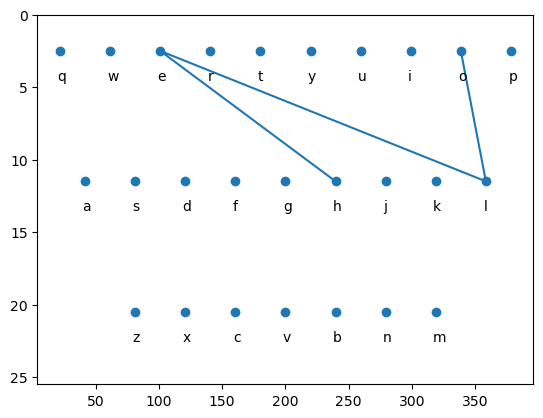

In [32]:
drawCrtPointsForSentence("HELLO")

In [33]:
def drawPointsWithNoiseForSentence( sentence : str,NOISE = 0.5):
    ax = drawKeyBoard()
    wordPointsList = []

    for char in sentence:
        char = char.lower()
        if (char != " "):
            noised_point = add_noise(keysPointsDict.get(char),NOISE = NOISE)
            wordPointsList.append(noised_point)

    x_coords  = [i.x for i in wordPointsList]
    y_coords  = [i.y for i in wordPointsList]


    ax.plot(x_coords,y_coords)
    text = getTextFromCoordinatesList(wordPointsList)
    return text


'hgtrertyuioploiuytrewertyuioiuytrtyhjklkjhgfd'

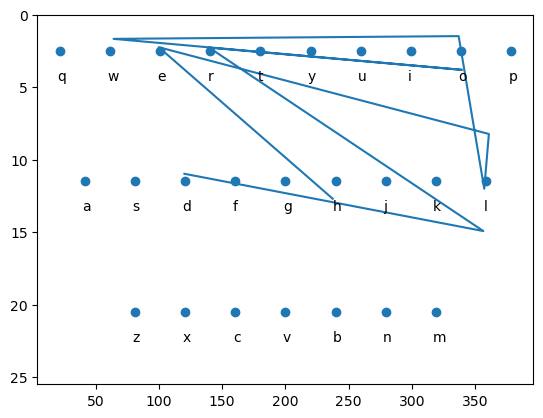

In [42]:

drawPointsWithNoiseForSentence("HELLO WORLD" , NOISE= 1.5)

In [47]:
import numpy as np
import matplotlib.pyplot as plt

P1 = keysPointsDict["q"]
P4 = keysPointsDict["z"]

P2 = np.random.rand(2) * np.array([P1.x,P1.y])
P3 = np.random.rand(2) * np.array([P4.x,P4.y])

P2 = Point(P2[0],P2[1])
P3 = Point(P3[0],P3[1])
print(P2)
print(P3)


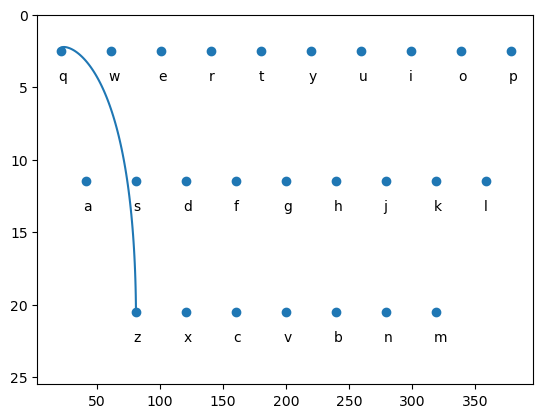

In [48]:

t = np.linspace(0, 1, 100)

Bx = (1 - t)**3 * P1.x + 3 * t * (1 - t)**2 * P2.x + 3 * t**2 * (1 - t) * P3.x + t**3 * P4.x
By = (1 - t)**3 * P1.y + 3 * t * (1 - t)**2 * P2.y + 3 * t**2 * (1 - t) * P3.y + t**3 * P4.y

ax = drawKeyBoard()

ax.plot(Bx, By, label="Bézier Curve")


In [49]:
def drawBezierCurve(ax,  p1 : Point, p2 : Point):

  x_diff = abs(p1.x - p2.x)
  y_diff = abs(p1.y - p2.y)

  x_min = min(p1.x, p2.x)
  y_min = min(p1.y, p2.y)

  P2 =  Point(x_min + (np.random.rand(1)[0] * x_diff),y_min + (np.random.rand(1)[0] * y_diff))
  P3 = Point(x_min + (np.random.rand(1)[0] * x_diff),y_min + (np.random.rand(1)[0] * y_diff))


  Bx = (1 - t)**3 * p1.x + 3 * t * (1 - t)**2 * P2.x + 3 * t**2 * (1 - t) * P3.x + t**3 * p2.x
  By = (1 - t)**3 * p1.y + 3 * t * (1 - t)**2 * P2.y + 3 * t**2 * (1 - t) * P3.y + t**3 * p2.y

  ax.plot(Bx, By)

  return (Bx, By)


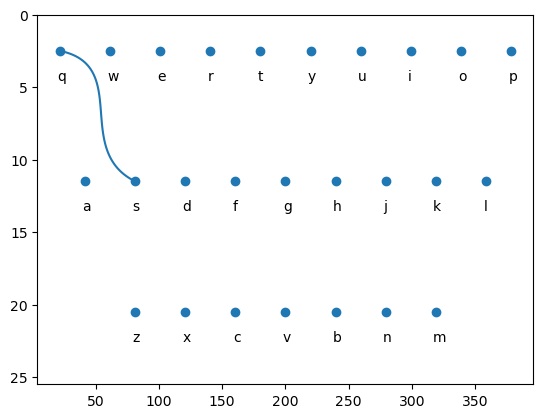

In [77]:
ax = drawKeyBoard()
p = drawBezierCurve(ax, keysPointsDict["q"] , keysPointsDict["s"] )

In [78]:
def drawCrtPointsWithCurveForSentence( sentence : str):
    ax = drawKeyBoard()
    wordPointsList = []

    for char in sentence:
        char = char.lower()
        if (char != " "):
            wordPointsList.append(keysPointsDict.get(char))

    text = ""

    for i in range(len( wordPointsList) -1):
        p1 = wordPointsList[i]
        p2 = wordPointsList[ i + 1]
        points = drawBezierCurve(ax, p1, p2)

        text = addAllKeysNearestToCurve(text,points[0], points[1])

    return text

'wertyuioiuytredsasdfgh'

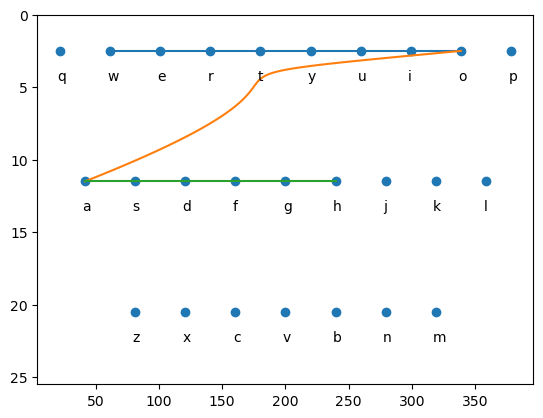

In [91]:
drawCrtPointsWithCurveForSentence("WOAH")

In [92]:
def drawNoisedPointsWithCurveForSentence( sentence : str,NOISE = 0.5):
    ax = drawKeyBoard()
    wordPointsList = []

    for char in sentence:
        char = char.lower()
        if (char != " "):
            noised_point = add_noise(keysPointsDict.get(char),NOISE = NOISE)
            wordPointsList.append(noised_point)

    text = ""

    for i in range(len( wordPointsList) -1):
        p1 = wordPointsList[i]
        p2 = wordPointsList[ i + 1]
        points = drawBezierCurve(ax, p1, p2)

        text = addAllKeysNearestToCurve(text,points[0], points[1])

    return text

Simulated text:  wertyuioiuytrewqwesdfgh 



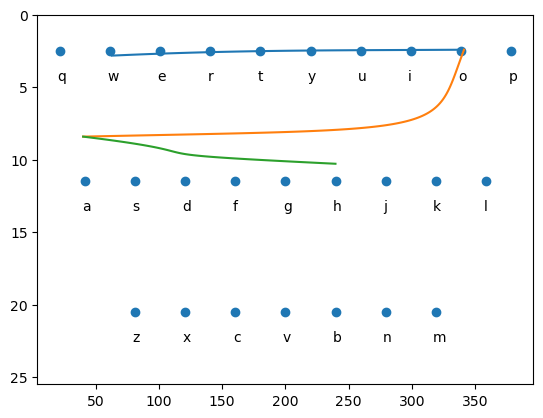

In [144]:
text = drawNoisedPointsWithCurveForSentence("WOAH", NOISE = 1.5)
print("Simulated text: ", text, "\n")